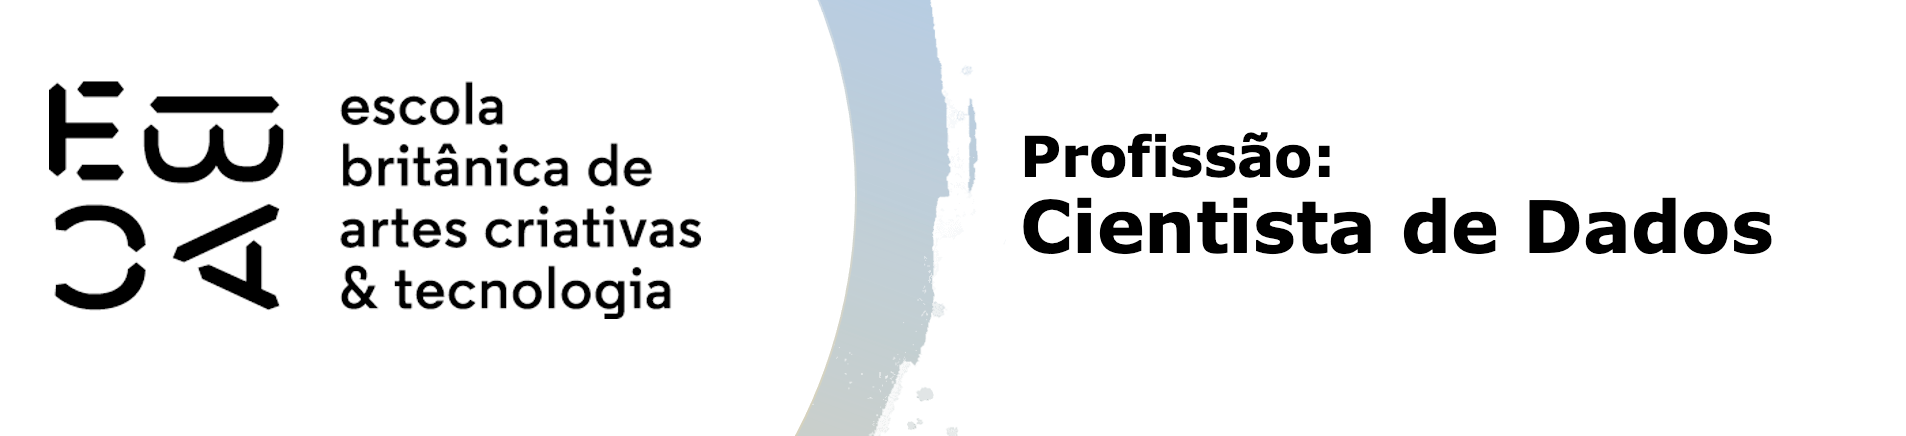

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('online_shoppers_intention.csv')

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

Estatísticas descritivas das variáveis de navegação:
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  
count            12330.000000    12330.000000             12330.000000  
mean                34.472398       31.731468              1194.746220  
std                140.749294       44.475503              1913.669288  
min                  0.000000        0.000000                 0.00000

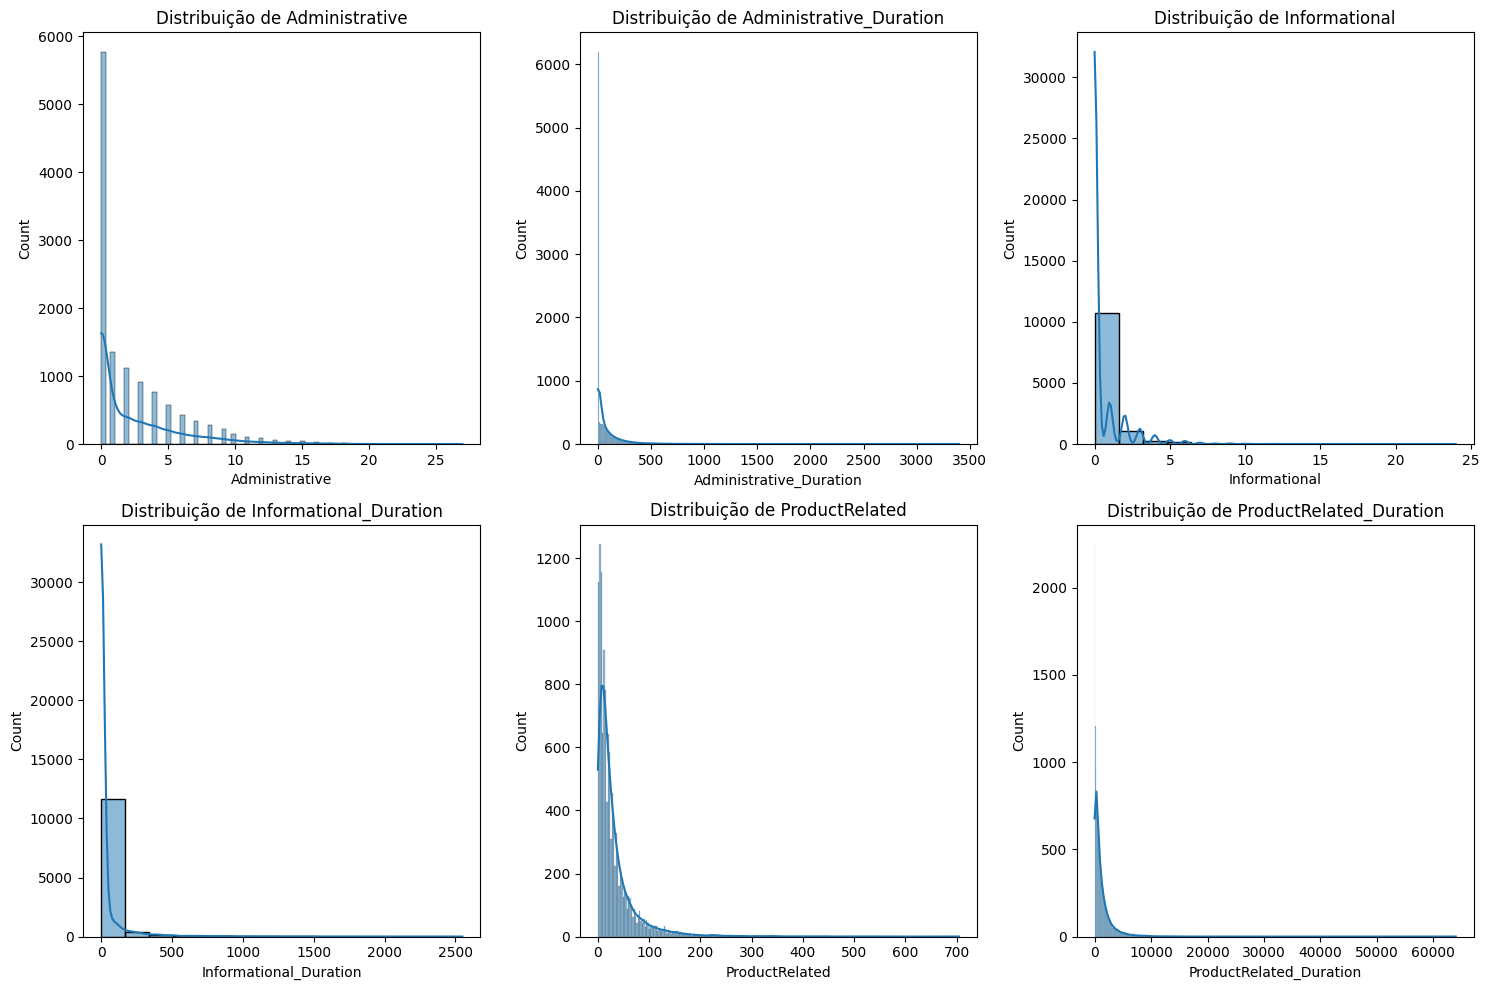

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estatísticas descritivas das variáveis do escopo
variables_scope = ['Administrative', 'Administrative_Duration', 'Informational', 
                   'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

# Verificando estatísticas descritivas
print("Estatísticas descritivas das variáveis de navegação:")
print(df[variables_scope].describe())

# Verificando se há valores missing
print("\nValores missing:")
print(df[variables_scope].isnull().sum())

# Visualizando a distribuição das variáveis
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables_scope):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribuição de {var}')
plt.tight_layout()
plt.show()



Estatísticas descritivas dos componentes principais (PCA):
               PCA1          PCA2
count  1.233000e+04  1.233000e+04
mean  -9.220344e-18  2.535595e-17
std    1.747148e+00  1.023087e+00
min   -1.304450e+00 -9.035521e+00
25%   -1.094939e+00 -3.422115e-01
50%   -5.788184e-01  3.859497e-02
75%    3.942610e-01  2.461646e-01
max    3.652109e+01  1.358638e+01


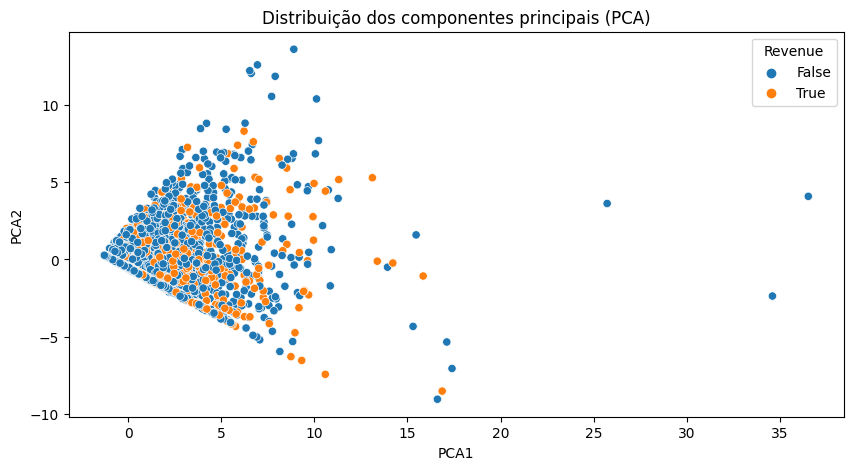

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Padronizando as variáveis de interesse
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[variables_scope])

# Aplicando PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Adicionando os componentes principais ao DataFrame
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Estatísticas descritivas dos componentes principais
print("\nEstatísticas descritivas dos componentes principais (PCA):")
print(df[['PCA1', 'PCA2']].describe())

# Visualizando os componentes principais
plt.figure(figsize=(10, 5))
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='Revenue')
plt.title('Distribuição dos componentes principais (PCA)')
plt.show()

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

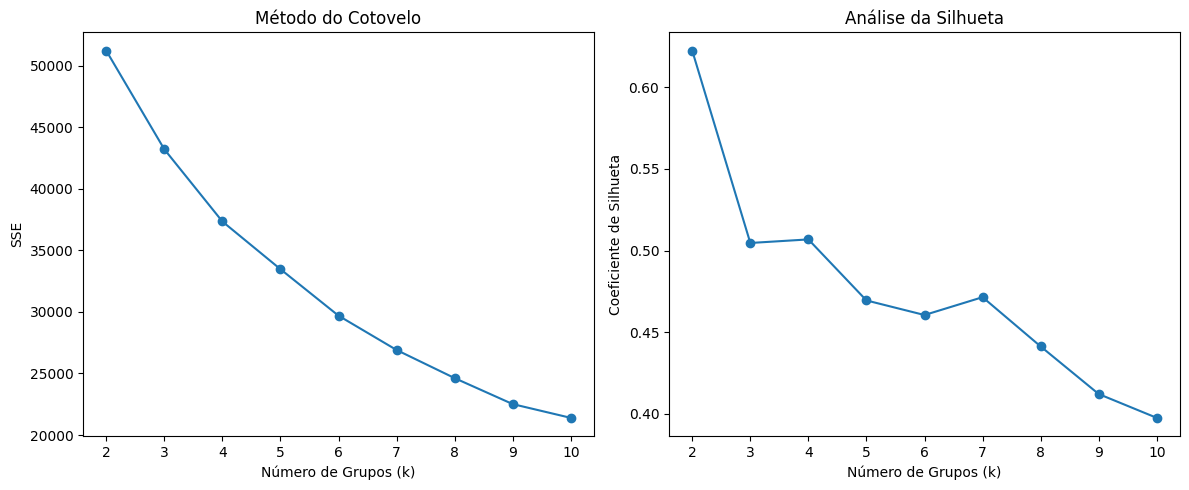

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Definindo o número máximo de clusters
max_clusters = 10

# Listas para armazenar os resultados
sse = []
silhouette_scores = []

# Aplicando KMeans e calculando SSE e silhueta
for n_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_scaled)
    
    # Calculando SSE
    sse.append(kmeans.inertia_)
    
    # Calculando o coeficiente de silhueta
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotando o Método do Cotovelo
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), sse, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Grupos (k)')
plt.ylabel('SSE')

# Plotando a Análise da Silhueta
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Análise da Silhueta')
plt.xlabel('Número de Grupos (k)')
plt.ylabel('Coeficiente de Silhueta')

plt.tight_layout()
plt.show()

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

Análise Descritiva para 3 Grupos:
            Administrative  Administrative_Duration  Informational  \
Cluster_3                                                           
0                6.523289               251.030033       0.973674   
1                7.058201               266.421802       4.086420   
2                0.907898                24.277938       0.160103   

           Informational_Duration  ProductRelated  ProductRelated_Duration  
Cluster_3                                                                   
0                       42.301835       55.539490              2056.320976  
1                      458.371554      138.380952              5731.105279  
2                        6.531608       18.900366               689.114236  

Análise Descritiva para 5 Grupos:
            Administrative  Administrative_Duration  Informational  \
Cluster_5                                                           
0                5.582528               158.163005       0.6

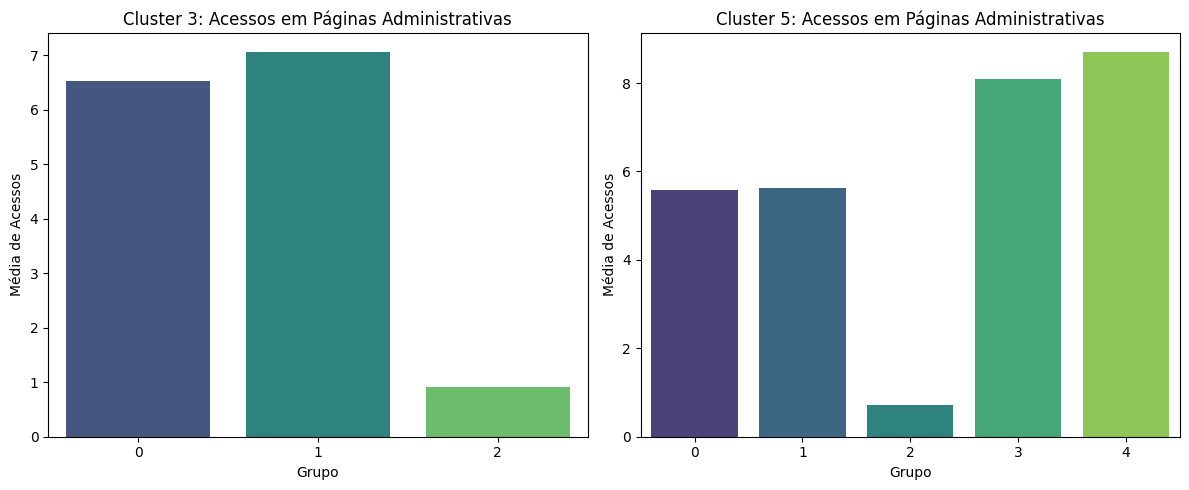

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Definindo o número de clusters
n_clusters_3 = 3
n_clusters_5 = 5

# Aplicando KMeans para 3 grupos
kmeans_3 = KMeans(n_clusters=n_clusters_3, random_state=42)
df['Cluster_3'] = kmeans_3.fit_predict(df_scaled)

# Aplicando KMeans para 5 grupos
kmeans_5 = KMeans(n_clusters=n_clusters_5, random_state=42)
df['Cluster_5'] = kmeans_5.fit_predict(df_scaled)

# Análise descritiva para 3 clusters
desc_3_clusters = df.groupby('Cluster_3')[['Administrative', 'Administrative_Duration', 
                                             'Informational', 'Informational_Duration', 
                                             'ProductRelated', 'ProductRelated_Duration']].mean()

# Análise descritiva para 5 clusters
desc_5_clusters = df.groupby('Cluster_5')[['Administrative', 'Administrative_Duration', 
                                             'Informational', 'Informational_Duration', 
                                             'ProductRelated', 'ProductRelated_Duration']].mean()

# Exibindo as análises descritivas
print("Análise Descritiva para 3 Grupos:\n", desc_3_clusters)
print("\nAnálise Descritiva para 5 Grupos:\n", desc_5_clusters)

# Visualizando os agrupamentos
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=desc_3_clusters.reset_index(), x='Cluster_3', y='Administrative', palette='viridis')
plt.title('Cluster 3: Acessos em Páginas Administrativas')
plt.xlabel('Grupo')
plt.ylabel('Média de Acessos')

plt.subplot(1, 2, 2)
sns.barplot(data=desc_5_clusters.reset_index(), x='Cluster_5', y='Administrative', palette='viridis')
plt.title('Cluster 5: Acessos em Páginas Administrativas')
plt.xlabel('Grupo')
plt.ylabel('Média de Acessos')

plt.tight_layout()
plt.show()

# Interpretação dos Gráficos

## Gráfico para 3 Grupos:
As três colunas são bem distintas, indicando que os grupos são claramente separados em termos de acessos e duração nas páginas. A presença de um grupo com valores baixos (Grupo 0), um grupo com valores intermediários (Grupo 1) e um grupo com valores altos (Grupo 2) sugere que os comportamentos de navegação dos usuários são bem definidos.
Essa separação sugere que a segmentação em 3 grupos é efetiva para capturar diferentes comportamentos de navegação.

## Gráfico para 5 Grupos:
A presença de duas colunas de altura semelhante e duas colunas maiores mas com alturas próximas indica que a distinção entre os grupos não é tão clara. Isso sugere que os grupos adicionais podem não estar capturando informações significativamente diferentes ou podem estar misturando comportamentos que são semelhantes.
A dificuldade em interpretar esses grupos pode indicar que a segmentação em 5 grupos é menos útil, uma vez que ela não revela novos insights em relação aos comportamentos de navegação dos usuários.

A segmentação em 3 grupos parece ser a melhor opção, pois os grupos são distintos e representam claramente diferentes comportamentos de navegação dos usuários.

# Sugestão de Classificação

## Para 3 Grupos:
|Grupo            |Descrição          | 
|------------------------|:-------------------| 
|Grupo 0| Navegadores Ocasionalmente Engajados (Baixos acessos e duração)|
|Grupo 1| Navegadores Altamente Engajados (Altos acessos e duração)|
|Grupo 2| Navegadores Pouco Engajados (Muito poucos acessos)|

## Para 5 Grupos:
|Grupo            |Descrição          | 
|------------------------|:-------------------| 
|Grupo 0| Navegadores Mínimos (Poucos acessos e duração)|
|Grupo 1| Navegadores Moderadamente Engajados (Acessos e duração baixos)|
|Grupo 2| Navegadores Engajados (Acessos e duração médios)|
|Grupo 3| Navegadores Altamente Engajados (Muitos acessos e duração alta)|
|Grupo 4| Navegadores Esporádicos (Poucos acessos, mas com uma duração média)|

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

O Grupo 1 para 3 grupos é o mais propenso à compra.